In [27]:
import numpy as np
from scipy import stats

In [29]:
def z_test(sample, population_mean, population_std):
    sample_mean = np.mean(sample)
    standard_error = population_std / np.sqrt(len(sample))
    z_statistic = (sample_mean - population_mean) / standard_error
    p_value = 2 * (1 -stats.norm.cdf(abs(z_statistic)))
    return z_statistic, p_value

np.random.seed(0)
sample = np.random.normal(loc=10, scale=2, size=100)
population_mean = 9
population_std = 2

z_statistic, p_value = z_test(sample, population_mean, population_std)
print(f"Z-statistic: {z_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis. The sample mean is not significantyl different from the population mean.")

Z-statistic: 5.5981
P-value: 0.0000
Reject the null hypothesis. The sample mean is significantly different from the population mean.


In [32]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Null Hypothesis:The sample mean is equal to the population mean.
Alternative Hypotheses:The sample mean is not equal to the population mean.
T-statistic: 0.5904
P-value: 0.5562
Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.


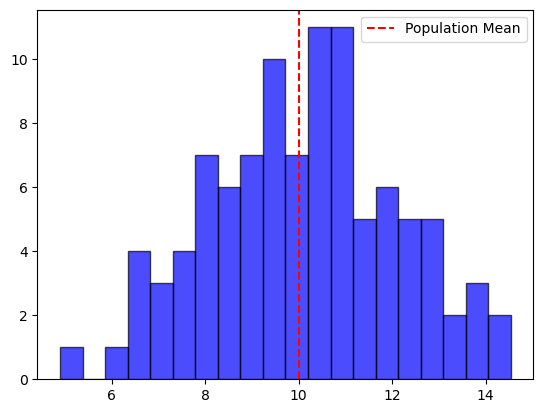

In [34]:
np.random.seed(0)
sample_size = 100
population_mean = 10
population_std = 2
sample = np.random.normal(loc=population_mean, scale = population_std, size=sample_size)
null_hypothesis = "The sample mean is equal to the population mean."
alternative_hypothesis = "The sample mean is not equal to the population mean."
t_statistic, p_value = stats.ttest_1samp(sample, population_mean)
print(f"Null Hypothesis:{null_hypothesis}")
print(f"Alternative Hypotheses:{alternative_hypothesis}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The sample mean is significantly different from the populations mean.")
else:
    print("Fail to reject the null hypothesis. The sample mean is not significantly different from the population mean.")

plt.hist(sample, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=population_mean, color='red', linestyle='--', label='Population Mean')
plt.legend()
plt.show()
            

In [37]:
import numpy as np
from scipy import stats

In [39]:
def one_sample_z_test(sample, population_mean, population_std):
    sample_mean = np.mean(sample)
    standard_error = population_std / np.sqrt(len(sample))
    z_statistic = (sample_mean - population_mean) / standard_error
    p_value = 2 * (1-stats.norm.cdf(abs(z_statistic)))
    return z_statistic, p_value

np.random.seed(0)
sample = np.random.normal(loc=10, scale=2, size=100)
population_mean = 9
population_std = 2
z_statistic, p_value = one_sample_z_test(sample, population_mean, population_std)
print(f"Sample Mean:{np.mean(sample):.4f}")
print(f"Z-statistic:{z_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis. The sample mean is not signinficantly different from the population mean.")

Sample Mean:10.1196
Z-statistic:5.5981
P-value: 0.0000
Reject the null hypothesis. The sample mean is significantly different from the population mean.


In [42]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Z-statistic: 2.5000
Critical Z-value:1.9600
P-Value: 0.0000
Reject the null hypothesis. The sample mean is significantly different from the population mean.


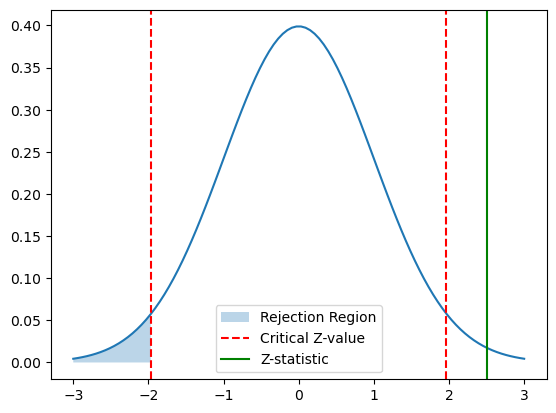

In [44]:
def two_tailed_z_test(sample_mean, population_mean, population_std, sample_size, alpha):
    standard_error = population_std / np.sqrt(sample_size)
    z_statistic = (sample_mean - population_mean) / standard_error
    critical_z = stats.norm.ppf(1 - alpha /2)
    p_calue = 2* (1- stats.norm.cdf(abs(z_statistic)))
    return z_statistic, critical_z, p_value

sample_mean = 10.5
population_mean = 10
population_std = 2
sample_size =100
alpha =0.05

z_statistic, critical_z, p_value = two_tailed_z_test(sample_mean, population_mean, population_std, sample_size, alpha)

print(f"Z-statistic: {z_statistic:.4f}")
print(f"Critical Z-value:{critical_z:.4f}")
print(f"P-Value: {p_value:.4f}")
if p_value < alpha:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis. the sample mean is not significanltly different from the population mean.")

x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)

plt.plot(x, y)
plt.fill_between(x, y, where=(x <-critical_z), alpha=0.3, label='Rejection Region')
plt.axvline(x=-critical_z, color='red', linestyle='--', label = "Critical Z-value")
plt.axvline(x=critical_z, color='red', linestyle='--')
plt.axvline(x=z_statistic, color='green', linestyle='-', label='Z-statistic')
plt.legend()
plt.show()


In [47]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Type 1 Error (alpha):0.0500
Type 2 Error (beta):0.0012
Power: 0.9988


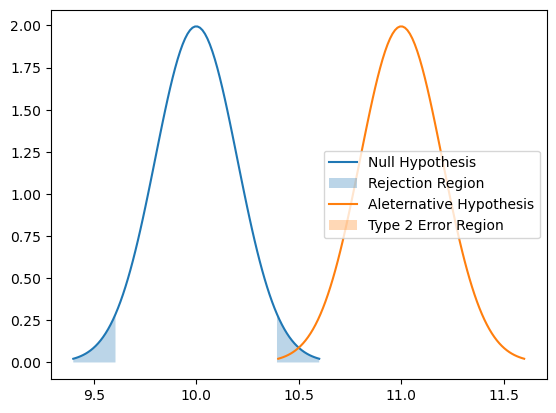

In [62]:
def calculate_errors(population_mean, sample_size, population_std, effect_size, alpha):
    standard_error = population_std / np.sqrt(sample_size)
    critical_z = stats.norm.ppf(1 -alpha /2)
    critical_sample_mean = population_mean + critical_z * standard_error
    type_1_error = alpha
    alternative_mean = population_mean + effect_size
    z_beta = (critical_sample_mean - alternative_mean) / standard_error
    type_2_error = stats.norm.cdf(z_beta)
    power = 1 -type_2_error
    return type_1_error, type_2_error, power

def visualize_errors(population_mean, sample_size, population_std, effect_size, alpha):
    standard_error = population_std / np.sqrt(sample_size)
    critical_z = stats.norm.ppf(1 - alpha /2)
    x_null = np.linspace(population_mean - 3 * standard_error, population_mean + 3 * standard_error, 100)
    y_null = stats.norm.pdf(x_null, loc=population_mean, scale=standard_error)
    alternative_mean = population_mean + effect_size
    x_alternative = np.linspace(alternative_mean - 3 * standard_error, alternative_mean + 3 *standard_error, 100)
    y_alternative = stats.norm.pdf(x_alternative, loc=alternative_mean, scale=standard_error)
    plt.plot(x_null, y_null, label='Null Hypothesis')
    plt.fill_between(x_null, y_null, where=(x_null < population_mean - critical_z * standard_error) | (x_null > population_mean + critical_z * standard_error), alpha=0.3, label='Rejection Region')
    plt.plot(x_alternative, y_alternative, label='Aleternative Hypothesis')
    plt.fill_between(x_alternative, y_alternative, where=(x_alternative < population_mean + critical_z * standard_error) & (x_alternative > population_mean - critical_z * standard_error), alpha=0.3, label='Type 2 Error Region')
    plt.legend()
    plt.show()

population_mean = 10
sample_size = 100
population_std =2
effect_size = 1
alpha = 0.05
type_1_error, type_2_error, power = calculate_errors(population_mean, sample_size, population_std, effect_size, alpha)
print(f"Type 1 Error (alpha):{type_1_error:.4f}")
print(f"Type 2 Error (beta):{type_2_error:.4f}")
print(f"Power: {power:.4f}")
visualize_errors(population_mean, sample_size, population_std, effect_size, alpha)

In [66]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

T-statistic: -4.1312
P-value: 0.0001
Reject the null hypothesis. The means of the two groups are significantly different.


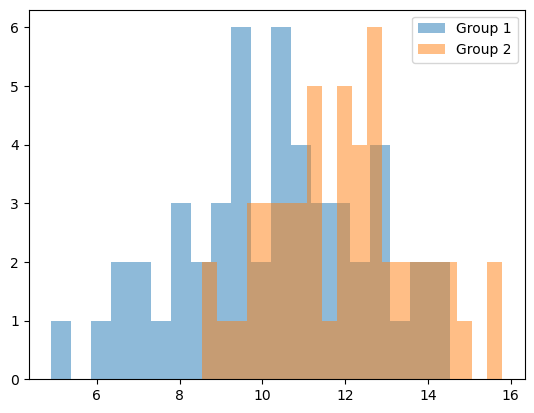

In [72]:
np.random.seed(0)
group1 = np.random.normal(loc=10, scale=2, size=50)
group2 = np.random.normal(loc=12, scale=2, size=50)
t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
alha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The means of the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis. Te means of the two groups are not significantly different.")

plt.hist(group1, bins=20, alpha=0.5, label = 'Group 1')
plt.hist(group2, bins=20, alpha=0.5, label = 'Group 2')
plt.legend()
plt.show()
         


T-statistic: -15.9773
P-value: 0.0000
Reject the null hypothesis. The means of the two groups are significantly different.


C:\Users\Admin\AppData\Local\Temp\ipykernel_5280\147293488.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before_treatment, after_treatment], labels=["Before Treatment", "After Treatment"])


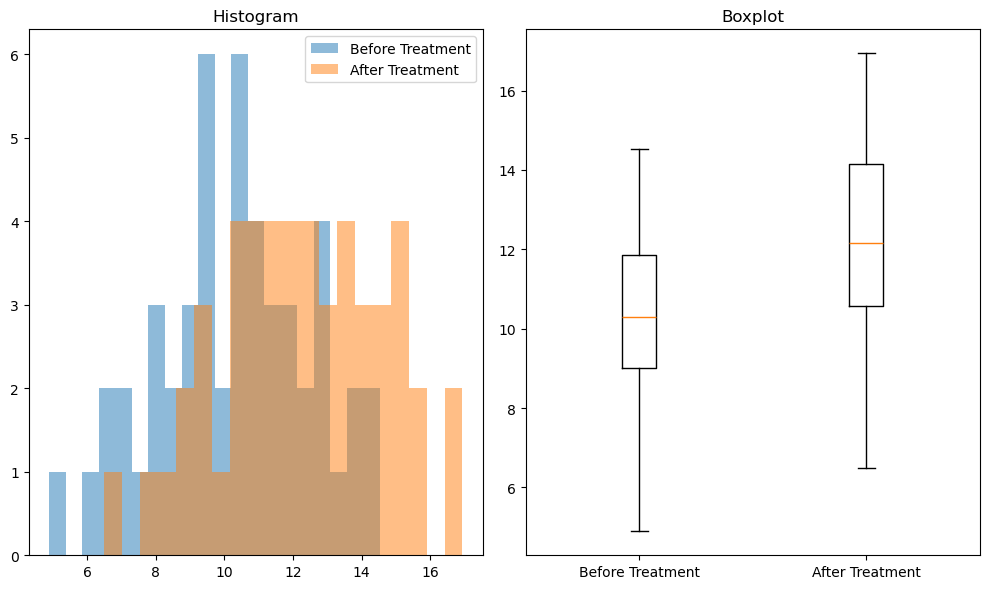

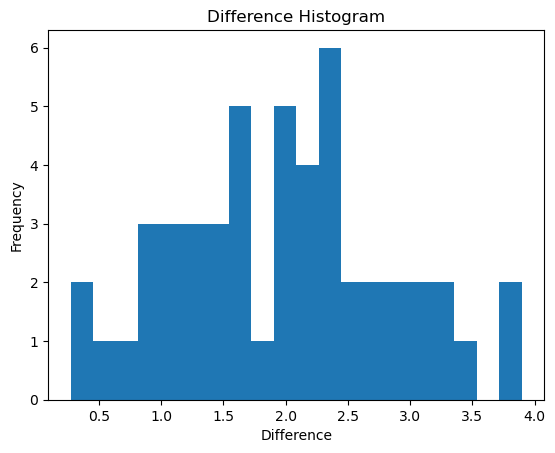

In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(0)
before_treatment = np.random.normal(loc=10, scale=2, size=50)
after_treatment = before_treatment + np.random.normal(loc = 2, scale=1, size =50)
t_statistic, p_value = stats.ttest_rel(before_treatment, after_treatment)
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The means of the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis. The means of the two groups are not significantly different.")

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(before_treatment, bins = 20, alpha=0.5, label = "Before Treatment")
plt.hist(after_treatment, bins=20, alpha=0.5, label="After Treatment")
plt.legend()
plt.title("Histogram")
plt.subplot(1,2,2)
plt.boxplot([before_treatment, after_treatment], labels=["Before Treatment", "After Treatment"])
plt.title("Boxplot")
plt.tight_layout()
plt.show()

difference =after_treatment - before_treatment
plt.hist(difference, bins=20)
plt.title("Difference Histogram")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

Sample Mean 1: 10.1196
Sample Mean 2: 10.6640
Sample Standard Deviation 1: 2.0259
Sample Standard Deviation 2: 2.0798
Z-statistic: -1.9248
P-value (Z-test): 0.0543
T-statistic: -15.9773
P-value (T-test): 0.0623
Fail to reject the null hypothesis (Z-test). The means are not significantly different.
Fail to reject the null hypothesis (T-test). The means are not significantly different.


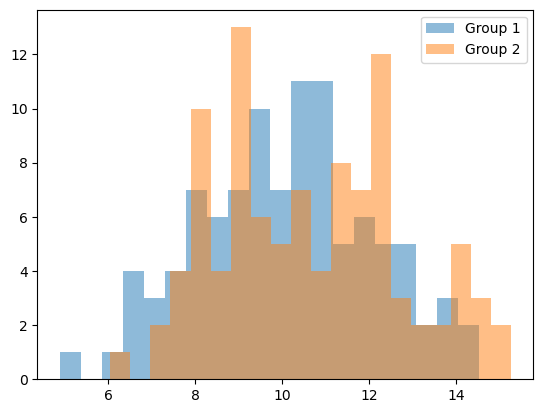

In [18]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100
mu1 = 10
mu2 = 10.5
sigma = 2

group1 = np.random.normal(mu1, sigma, n)
group2 = np.random.normal(mu2, sigma, n)

mean1 = np.mean(group1)
mean2 = np.mean(group2)
std1 = np.std(group1, ddof=1)
std2 = np.std(group2, ddof=1)

print(f"Sample Mean 1: {mean1:.4f}")
print(f"Sample Mean 2: {mean2:.4f}")
print(f"Sample Standard Deviation 1: {std1:.4f}")
print(f"Sample Standard Deviation 2: {std2:.4f}")

z_statistic = (mean1 - mean2) / (sigma * np.sqrt(2 /n))
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_statistic)))
print(f"Z-statistic: {z_statistic:.4f}")
print(f"P-value (Z-test): {p_value_z:.4f}")

t_statistc, p_value_t = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value (T-test): {p_value_t:.4f}")

alpha = 0.05
if p_value_z < alpha:
    print("Reject the null hypothesis (Z-test). The means are significantly different.")
else:
    print("Fail to reject the null hypothesis (Z-test). The means are not significantly different.")

if p_value_t < alpha:
    print("Reject the null hypothesis (T-test). The means are significantly different.")
else:
    print("Fail to reject the null hypothesis (T-test). The means are not significantly different.")

plt.hist(group1, bins=20, alpha=0.5, label="Group 1")
plt.hist(group2, bins=20, alpha=0.5, label="Group 2")
plt.legend()
plt.show()

In [37]:
import numpy as np
from scipy import stats

def calculate_confidence_interval(data, confidence_level=0.95):
    """
    Calculate the confidence interval for a sample mean.

    Parameters:
    data (list or numpy array): Sample data
    confidence_level (float, optional): Confidence level (default:0.95)

    Returns:
    tuple: Lower and upper bound of the confidence interval
    """
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    n = len(data)
    standard_error = sample_std / np.sqrt(n)
    if n >=30:
        critical_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    else:
        critical_value = stats.t.ppf(1- (1-confidence_level) / 2, df=n -1)
    margin_of_error = critical_value * standard_error
    lower_bound = sample_mean + margin_of_error
    upper_bound = sample_mean + margin_of_error
    return lower_bound, upper_bound

data = np.random.normal(loc=10, scale=2, size=50)
confidence_level = 0.95
lower_bound, upper_bound = calculate_confidence_interval(data, confidence_level)
print(f"Confidence Interval({confidence_level*100}%):({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval(95.0%):(10.3111, 10.3111)


In [44]:
import numpy as np
from scipy import stats

def calculate_margin_of_error(data, confidence_level=0.95):
    """
    Calculate the mergin of error for a given confidence level.

    Parameters:
    data (list of numpy arra): Sample data
    confidence_level (float, optional):Confidence level (default: 0.95)

    Returns:
    float: Margin of error
    """

    sample_std = np.std(data, ddof=1)
    n = len(data)
    standard_error = sample_std / np.sqrt(n)
    if n>30:
        critical_value = stats.norm.ppf(1 - (1 -confidence_level) / 2)
    else:
        critical_value = stats.t.ppf(1 - (1 -confidence_level) / 2 , df=n -1)
    margin_of_error = critical_value * standard_error
    return margin_of_error

data = np.random.normal(loc=10, scale =2, size=50)
confidence_level = 0.95
margin_of_error = calculate_margin_of_error(data, confidence_level)
print(f"Margin of Error({confidence_level*100}% confidence level): {margin_of_error:.4f}")

Margin of Error(95.0% confidence level): 0.4812


Posterior Mean:1.0095
Posterior Standard Deviation:0.2182


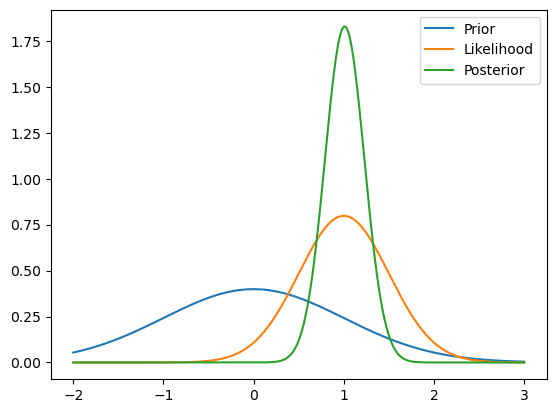

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

prior_mean = 0
prior_std = 1
likelihood_mean = 1
likelihood_std = 0.5
observed_data = np.array([1.1,0.9,1.2,1.0,1.1])

def calculate_posterior(prior_mean, prior_std, likelihood_mean, likelihood_std, observed_data):
    likelihood = norm.pdf(observed_data, loc=likelihood_mean, scale=likelihood_std)
    posterior_precision = 1 / (prior_std ** 2) + len(observed_data) / (likelihood_std ** 2)
    posterior_mean = ((prior_mean / (prior_std ** 2)) + np.sum(observed_data) / (likelihood_std ** 2)) / posterior_precision
    posterior_std = np.sqrt(1 / posterior_precision)
    return posterior_mean, posterior_std

posterior_mean, posterior_std = calculate_posterior(prior_mean, prior_std, likelihood_mean, likelihood_std, observed_data)
print(f"Posterior Mean:{posterior_mean:.4f}")
print(f"Posterior Standard Deviation:{posterior_std:.4f}")
x = np.linspace(-2, 3, 1000)
prior = norm.pdf(x, loc=prior_mean, scale=prior_std)
likelihood = norm.pdf(x, loc=likelihood_mean, scale=likelihood_std)
posterior = norm.pdf(x, loc=posterior_mean, scale=posterior_std)
plt.plot(x, prior, label="Prior")
plt.plot(x, likelihood, label = "Likelihood")
plt.plot(x, posterior, label = "Posterior")
plt.legend()
plt.show()
    

In [56]:
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd

data = np.array([[20, 15, 10], [10, 20, 15]])
columns = ['Category A', 'Category B', 'Category C']
index = ['Group 1', 'Group 2']
df =pd.DataFrame(data, index=index, columns=columns)
print("Contingency Table:")
print(df)

chi2_statistic, p_value, dof, expected = chi2_contingency(df)
print(f"\nChi-Square Statistic:{chi2_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis. The variables are likely dependent (p-value .= {alpha}).")
else:
    print(f"\nFail to reject the null hypothesis. The variables are likely independent (p-value >= {alpha}).")

expected_df =  pd.DataFrame(expected, index=index, columns=columns)
print("\nExpected frequencies:")
print(expected_df)

Contingency Table:
         Category A  Category B  Category C
Group 1          20          15          10
Group 2          10          20          15

Chi-Square Statistic:5.0476
P-Value: 0.0802
Degrees of Freedom: 2

Fail to reject the null hypothesis. The variables are likely independent (p-value >= 0.05).

Expected frequencies:
         Category A  Category B  Category C
Group 1        15.0        17.5        12.5
Group 2        15.0        17.5        12.5


In [61]:
import numpy as np
import pandas as pd

def calculate_expected_frequencies(observed_data):
    """
    Calculate the expected frequencies for a Chi-square test.
    parameters:
    observed_data (2D numpy array or pandas DataFrame): Observed frequency table.
    Returns:
    expeced_frequencies (2D numpy array or pandas DataFrame): Expected frequencytable.
    """
    row_totals = observed_data.sum(axis=1)
    column_totals = observed_data.sum(axis=0)
    grand_total = observed_data.sum().sum()
    expected_frequencies = np.outer(row_totals, column_totals) / grand_total
    return expected_frequencies

data = np.array([[20, 15, 10], [10, 20, 15]])
columns = ['Category A', 'Category B', 'Category C']
index = ['Group 1', 'Group 2']
df = pd.DataFrame(data, index=index, columns=columns)
print("Observed Frequencies:")
print(df)

expected_frequencies = calculate_expected_frequencies(df)
expected_df = pd.DataFrame(expected_frequencies, index=index, columns=columns)
print("\nExpected Frequencies:")
print(expected_df)

Observed Frequencies:
         Category A  Category B  Category C
Group 1          20          15          10
Group 2          10          20          15

Expected Frequencies:
         Category A  Category B  Category C
Group 1        15.0        17.5        12.5
Group 2        15.0        17.5        12.5


Chi-Square Statistic:2.0000
P-Value: 0.8491

Fail to reject the null hypothesis. The observed data fits the expected distribution (p-value >= 0.05).


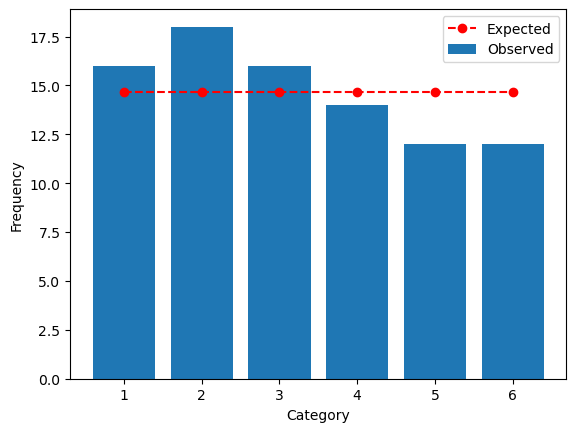

In [90]:
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

observed_frequencies = np.array([16, 18, 16, 14, 12, 12])
total_observations = observed_frequencies.sum()
expected_frequencies = np.array([total_observations / len(observed_frequencies)] * len(observed_frequencies))
chi2_statistic, p_value = chisquare(observed_frequencies, expected_frequencies)

print(f"Chi-Square Statistic:{chi2_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis. The observed data does not fit the expeted distribution (p-value < {alpha}).")
else:
    print(f"\nFail to reject the null hypothesis. The observed data fits the expected distribution (p-value >= {alpha}).")

categories = np.arange(1, len(observed_frequencies) +1)
plt.bar(categories, observed_frequencies, label="Observed")
plt.plot(categories, expected_frequencies, label="Expected", marker="o", linestyle="--", color="red")
plt.legend()
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

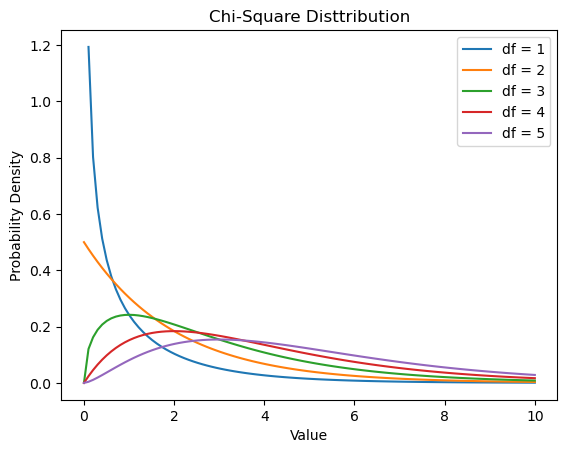

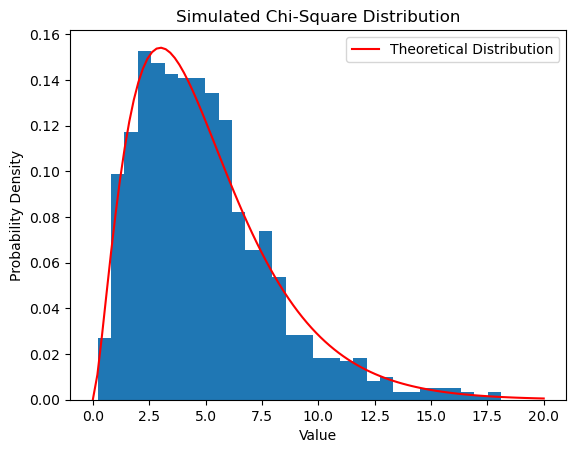

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

df = [1,2,3,4,5]
x = np.linspace(0, 10, 100)
fig, ax = plt.subplots()
for i in df:
    y = chi2.pdf(x, i)
    ax.plot(x, y, label=f"df = {i}")

ax.set_title("Chi-Square Disttribution")
ax.set_xlabel("Value")
ax.set_ylabel("Probability Density")
ax.legend()
plt.show()
np.random.seed(0)
simulated_data = np.random.chisquare(df=5, size=1000)
plt.hist(simulated_data, bins=30, density=True)
x = np.linspace(0, 20, 100)
y = chi2.pdf(x, df=5)
plt.plot(x, y, label="Theoretical Distribution", color="red")
plt.title("Simulated Chi-Square Distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

In [103]:
import numpy as np
import scipy.stats as stats

np.random.seed(0)
sample1 = np.random.randn(25)
sample2 = np.random.randn(20)

variance1 = np.var(sample1, ddof=1)
variance2 = np.var(sample2, ddof=1)

f_value = variance1 / variance2
df1 = len(sample1) - 1
df2 = len(sample2) - 1

p_value = 2 * (1 - stats.f.cdf(f_value, df1, df2)) if f_value > 1 else 2 * stats.f.cdf(f_value, df1, df2)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: variances are not equal")

print("F-statistic:", f_value)
print("p-value:", p_value)

F-statistic: 0.9174670392745384
p-value: 0.8311053645573795


F-Statistic: 4.2477
P-Value: 0.0249

Reject the null hypothesis. The means are not equal (p-value < 0.05).


C:\Users\Admin\AppData\Local\Temp\ipykernel_5280\380833988.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2, group3], labels=["Group 1", "Group 2", "Group 3"])


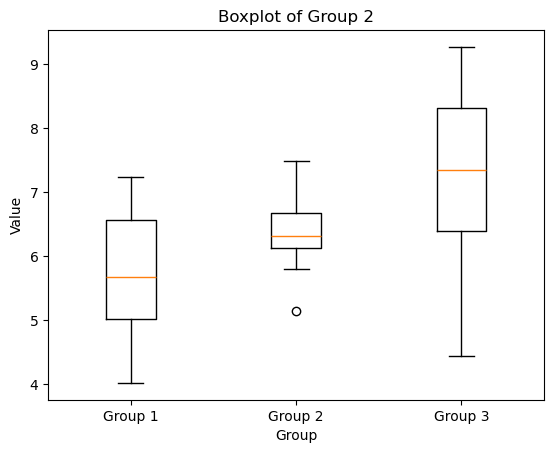

In [106]:
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

np.random.seed(0)
group1 = np.random.randn(10) + 5
group2 = np.random.randn(10) + 6
group3 = np.random.randn(10) + 7

f_statistic, p_value = f_oneway(group1, group2, group3)
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis. The means are not equal (p-value < {alpha}).")
else:
    print(f"\nFail to reject the null hypothesis. The means are equal (p-value >= {alpha}).")

plt.boxplot([group1, group2, group3], labels=["Group 1", "Group 2", "Group 3"])
plt.title("Boxplot of Group 2")
plt.xlabel("Group")
plt.ylabel("Value")
plt.show()

F-Statistic: 4.2477
P-Value: 0.0249

Reject the null hypothesis. The means are not equal (p-value < 0.05).


C:\Users\Admin\AppData\Local\Temp\ipykernel_5280\3658294027.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2, group3], labels=["Group 1", "Group 2", "Group 3"])


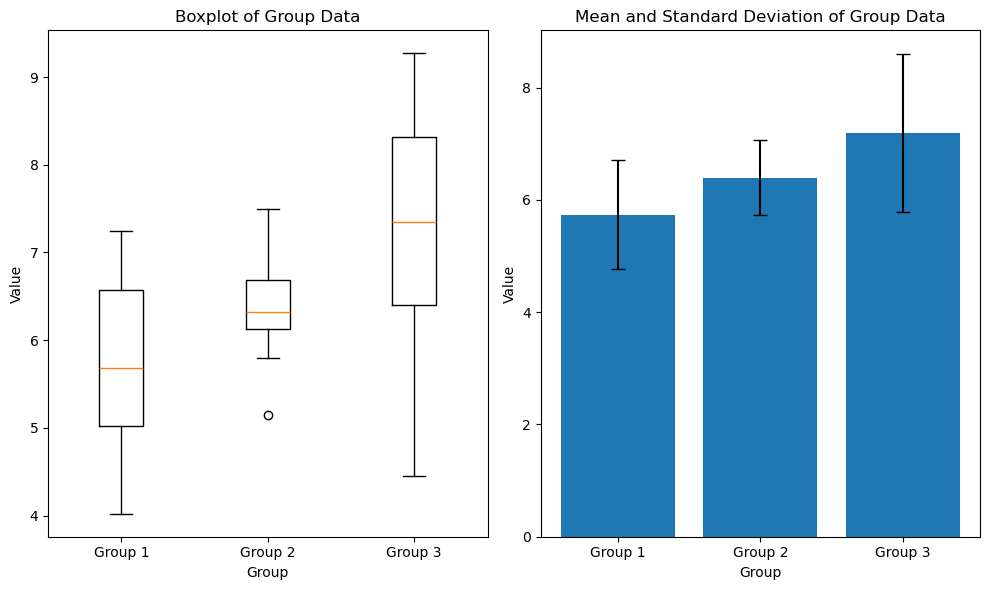

In [109]:
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

np.random.seed(0)
group1 = np.random.randn(10) + 5
group2 = np.random.randn(10) + 6
group3 = np.random.randn(10) + 7

f_statistic, p_value = f_oneway(group1, group2, group3)
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis. The means are not equal (p-value < {alpha}).")
else:
    print(f"\nFail to reject the null hypothesis. The means are equal (p-value >= {apha}.")

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.boxplot([group1, group2, group3], labels=["Group 1", "Group 2", "Group 3"])
plt.title("Boxplot of Group Data")
plt.xlabel("Group")
plt.ylabel("Value")

plt.subplot(1,2,2)
plt.bar(["Group 1", "Group 2", "Group 3"], [np.mean(group1), np.mean(group2), np.mean(group3)], yerr=[np.std(group1), np.std(group2), np.std(group3)], capsize=5)
plt.title("Mean and Standard Deviation of Group Data")
plt.xlabel("Group")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

Normality assumption met fr Group 1 (p-value = 0.8357)
Normality assumption met fr Group 2 (p-value = 0.5856)
Normality assumption met fr Group 3 (p-value = 0.9154)

Equal variance assumption met (p-value = 0.0817)


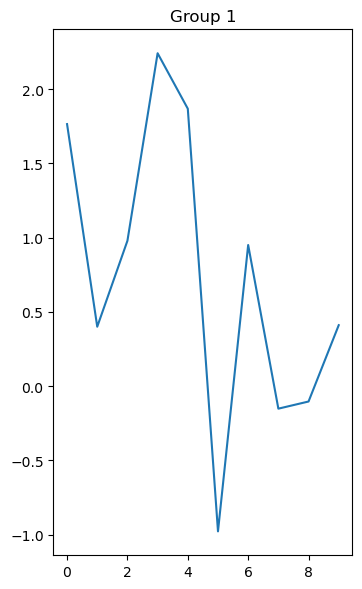

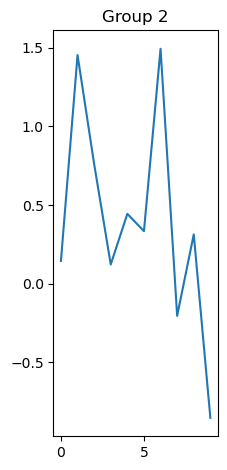

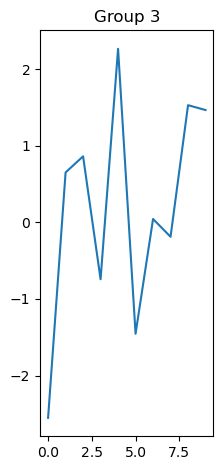

In [120]:
import numpy as np
from scipy.stats import shapiro, levene
import matplotlib.pyplot as plt

def check_anova_assumptions(data):
    normality_results = {}
    for i, group in enumerate(data):
        stat, p = shapiro(group)
        normality_results[f"Group{i+1}"]={"Statistic": stat, "p-value":p}
        if p < 0.05:
            print(f"Normality assumption not met for Group {i+1} (p-value = {p:.4f})")
        else:
            print(f"Normality assumption met fr Group {i+1} (p-value = {p:.4f})")
    stat, p = levene(*data)
    if p < 0.05:
        print(f"\nEqual variance assumption not met (p-value = {p:.4f})")
    else:
        print(f"\nEqual variance assumption met (p-value = {p:.4f})")
    plt.figure(figsize=(10, 6))
    for i, group in enumerate(data):
        plt.subplot(1, len(data), i+1)
        plt.plot(group)
        plt.title(f"Group {i+1}")
        plt.tight_layout()
        plt.show()

np.random.seed(0)
group1 = np.random.randn(10)
group2 = np.random.randn(10)
group3 = np.random.randn(10)
check_anova_assumptions([group1, group2, group3])

                          sum_sq    df         F    PR(>F)
C(Factor1)             10.566460   2.0  4.062009  0.030240
C(Factor2)              1.514073   1.0  1.164094  0.291343
C(Factor1):C(Factor2)   0.092091   2.0  0.035402  0.965268
Residual               31.215470  24.0       NaN       NaN


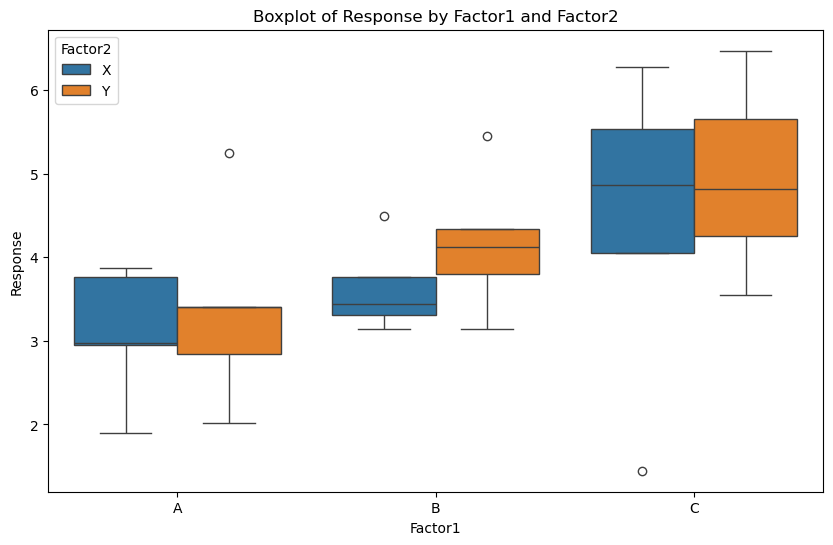

C:\Users\Admin\AppData\Local\Temp\ipykernel_5280\2473801734.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x="Factor1", y="Response", hue="Factor2", data=df, ci=None)


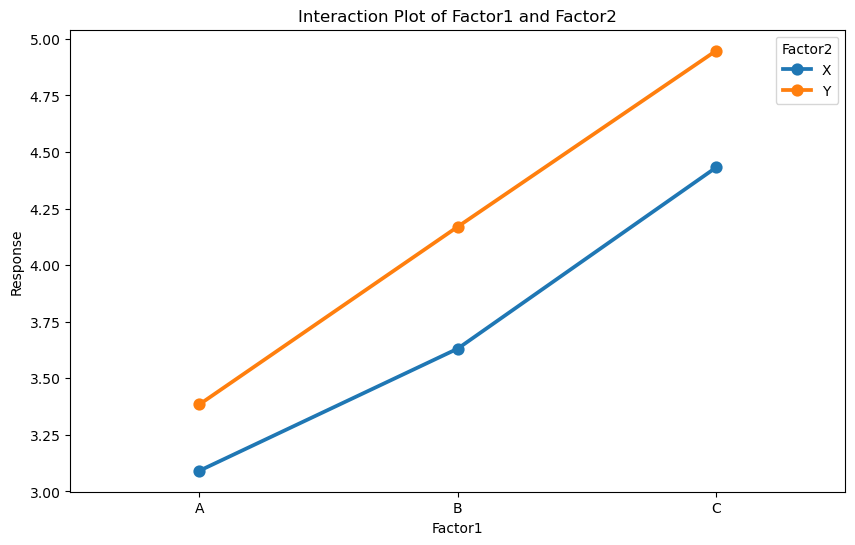

In [135]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
factor1 = np.repeat(["A", "B", "C"], 10)
factor2 = np.tile(["X", "Y"], 15)
response = np.random.randn(30) + np.array([1 if f1 == "A" else 2 if f1 == "B" else 3 for f1 in factor1]) + np.array([1 if f2 == "X" else 2 for f2 in factor2])

df = pd.DataFrame({"Factor1": factor1, "Factor2": factor2, "Response": response})
model = ols("Response ~ C(Factor1) * C(Factor2)", data=df).fit()
anova_results = anova_lm(model, typ=2)

print(anova_results)

plt.figure(figsize=(10,6))
sns.boxplot(x="Factor1", y="Response", hue="Factor2", data=df)
plt.title("Boxplot of Response by Factor1 and Factor2")
plt.show()

plt.figure(figsize=(10, 6))
sns.pointplot(x="Factor1", y="Response", hue="Factor2", data=df, ci=None)
plt.title("Interaction Plot of Factor1 and Factor2")
plt.show()

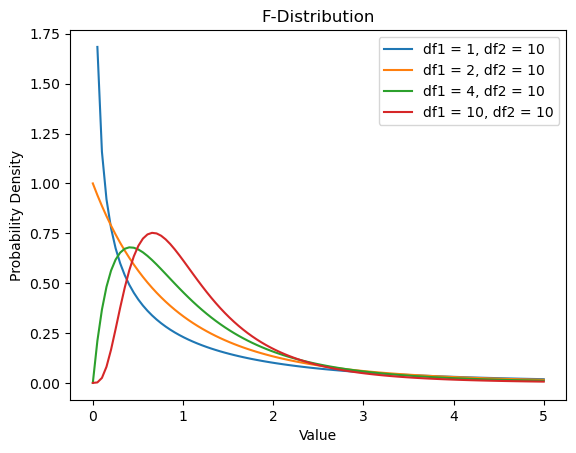

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

df1 = [1,2,4,10]
df2 = 10
x = np.linspace(0, 5, 100)
fig, ax = plt.subplots()
for i in df1:
    y = f.pdf(x, i, df2)
    ax.plot(x, y, label=f"df1 = {i}, df2 = {df2}")

ax.set_title("F-Distribution")
ax.set_xlabel("Value")
ax.set_ylabel("Probability Density")
ax.legend()
plt.show()

F-statistic: 0.6146
P-value: 0.5482

Fail to reject the null hypothesis. The means are equal (p-value >= 0.05).


C:\Users\Admin\AppData\Local\Temp\ipykernel_5280\1086785198.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2, group3], labels=["Group 1", "Group 2", "Group 3"])


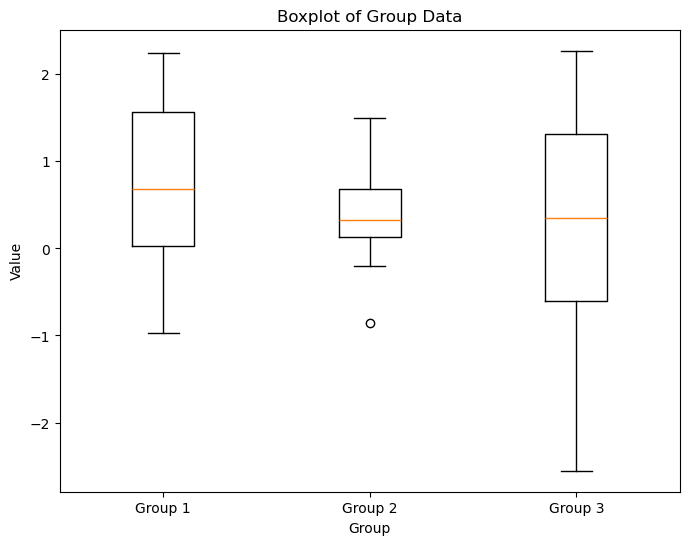

In [143]:
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

np.random.seed(0)
f_statistic, p_value = f_oneway(group1, group2, group3)
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print (f"\nReject the null hypothesis. The means are not equal (p-value < {alpha}).")
else:
    print(f"\nFail to reject the null hypothesis. The means are equal (p-value >= {alpha}).")

plt.figure(figsize=(8, 6))
plt.boxplot([group1, group2, group3], labels=["Group 1", "Group 2", "Group 3"])
plt.title("Boxplot of Group Data")
plt.xlabel("Group")
plt.ylabel("Value")
plt.show()

One-Sample T-Test:
T-Statistic: -1.8776
P-Value: 0.0634

Fail to reject the null hypothesis. The mean is equal to 5.5 (p-value >= 0.05).

Two-sample T-Test:
T-Statistic: -3.5972
P-Value: 0.0004

Reject the null hypothesis. The means are not equal (p-value < 0.05).


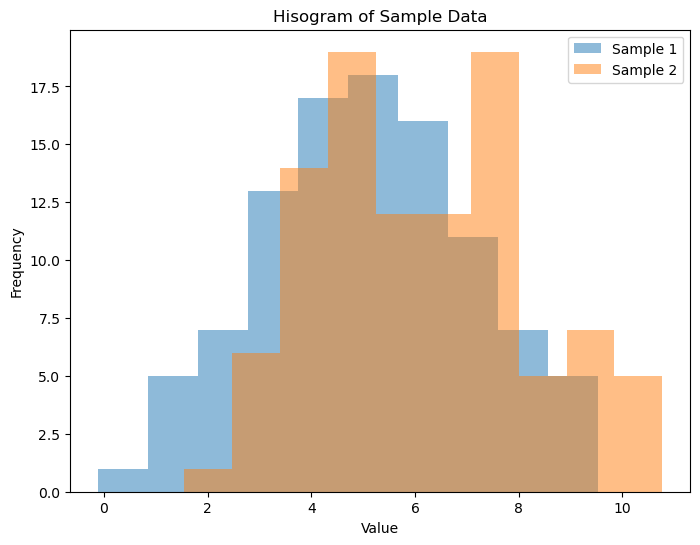

In [148]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind
import matplotlib.pyplot as plt

np.random.seed(0)
sample1 = np.random.normal(loc=5, scale=2, size=100)
sample2 = np.random.normal(loc=6, scale=2, size=100)

t_statistic, p_value = ttest_1samp(sample1, 5.5)
print(f"One-Sample T-Test:")
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis. The mean is not equal to 5.5 (p-value < {alpha}).")
else:
    print(f"\nFail to reject the null hypothesis. The mean is equal to 5.5 (p-value >= {alpha}).")

t_statistic, p_value = ttest_ind(sample1, sample2)
print(f"\nTwo-sample T-Test:")
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < alpha:
    print(f"\nReject the null hypothesis. The means are not equal (p-value < {alpha}).")
else:
    print(f"\nFail to reject the null hypothesis. The means are equal (p-value >= {alpha}).")

plt.figure(figsize=(8, 6))
plt.hist(sample1, alpha=0.5, label="Sample 1")
plt.hist(sample2, alpha=0.5, label="Sample 2")
plt.title("Hisogram of Sample Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [153]:
import numpy as np
from scipy.stats import chi2

np.random.seed(0)
sample = np.random.normal(loc=5, scale=2, size=100)
sample_variance = np.var(sample, ddof=1)
null_variance = 4
n = len(sample)
chi2_statistic = (n-1)* sample_variance / null_variance
df = n -1
p_value = 2 * min(chi2.cdf(chi2_statistic, df), 1 - chi2.cdf(chi2_statistic, df))

print(f"Chi-Square Statistic:{chi2_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print (f"\nReject the null hypothesis. The population variance is not equal to {null_variance} (p-value < {alpha}).")
else:
    print(f"\nFail to reject the null hypothesis. the population variance is equal to {null_variance} (p-value >= {alpha}).")

Chi-Square Statistic:101.5827
P-value: 0.8187

Fail to reject the null hypothesis. the population variance is equal to 4 (p-value >= 0.05).


In [160]:
import numpy as np
from scipy.stats import norm

def z_test_proportions(successes1, total1, successes2, total2):
    p1 = successes1 / total1
    p2 = successes2 / total2
    pooled_p =(successes1 + successes2) / (total1 +total2)
    se = np.sqrt(pooled_p * (1 - pooled_p) * (1 / total1 + 1 / total2))
    z_statistic = (p1 -p2) / se
    p_value = 2 * (1 -norm.cdf(np.abs(z_statistic)))
    return z_statistic, p_value

successes1 = 120
total1 = 200
successes2 = 150
total2 = 250

z_statistic, p_value = z_test_proportions(successes1, total1, successes2, total2)

print(f"Z-Statistic: {z_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis. The proprortions are not equal (p-value , {alpha}).")
else:
    print(f"\nFail to reject the null hypothesis. The proportions are equal (p-value .+ {alpha}).")

Z-Statistic: 0.0000
P-Value: 1.0000

Fail to reject the null hypothesis. The proportions are equal (p-value .+ 0.05).


F-Statistic: 0.4217
P-Value: 0.0000

Reject the null hypothesis. The variances are not equal (p-value < 0.05).


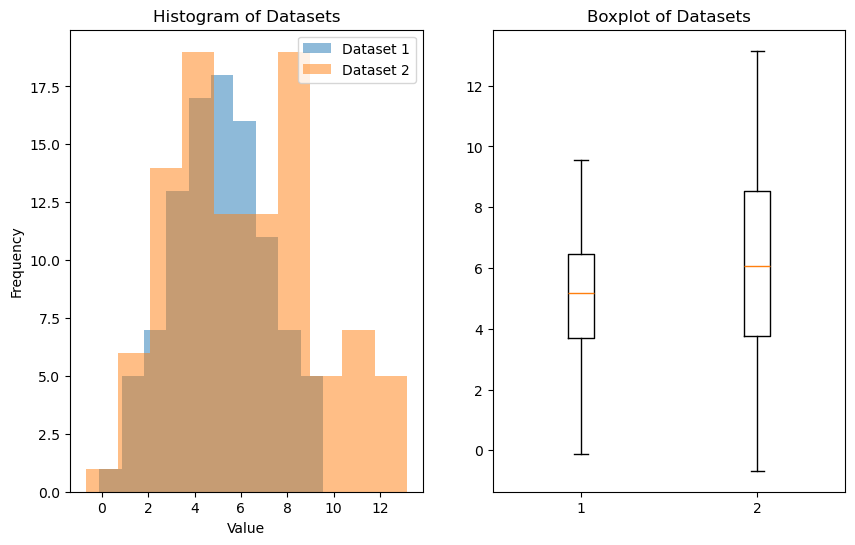

In [8]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

np.random.seed(0)
dataset1 = np.random.normal(loc=5, scale=2, size=100)
dataset2 = np.random.normal(loc=6, scale=3, size=100)

variance1 = np.var(dataset1, ddof=1)
variance2 = np.var(dataset2, ddof=1)
f_statistic = variance1 / variance2
df1 = len(dataset1) - 1
df2 = len(dataset2) - 1
p_value = 2 * (1 - f.cdf(f_statistic, df1, df2)) if f_statistic > 1 else 2 * f.cdf(f_statistic, df1, df2)
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis. The variances are not equal (p-value < {alpha}).")
else:
    print(f"\nFail to reject the null hypothesis. The variances are equal (p-value >= {alpha}).")

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(dataset1, alpha=0.5, label="Dataset 1")
plt.hist(dataset2, alpha=0.5, label="Dataset 2")
plt.title("Histogram of Datasets")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.subplot(1,2,2)
plt.boxplot([dataset1, dataset2], label=["Dataset 1", "Dataset 2"])
plt.title("Boxplot of Datasets")
plt.show()      

Chi-Square Statistic:0.5813
P-Value: 0.7478

Fail to reject the null hypothesis. The observed frequencies fitthe expected distribution (p-value >= 0.05).


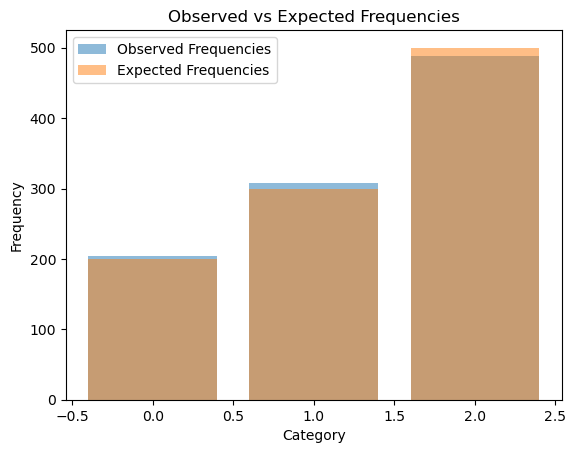

In [16]:
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

np.random.seed(0)
observed_frequencies = np.random.multinomial(1000, [0.2, 0.3, 0.5])
expected_frequencies = [200, 300, 500]
chi2_statistic, p_value = chisquare(observed_frequencies, expected_frequencies)

print(f"Chi-Square Statistic:{chi2_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis. The observed frequencies do not fit the expected distribution (p-value < {alpha}).")
else:
    print(f"\nFail to reject the null hypothesis. The observed frequencies fitthe expected distribution (p-value >= {alpha}).")

plt.bar(range(len(observed_frequencies)), observed_frequencies, alpha=0.5, label="Observed Frequencies")
plt.bar(range(len(expected_frequencies)), expected_frequencies, alpha=0.5, label="Expected Frequencies")
plt.title("Observed vs Expected Frequencies")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.legend()
plt.show()